In [1]:
%matplotlib inline
from utils import *

# BLUF - Bottom Line Up Front

Clustering using Node2vec representation was mostly unsucessful. 

For each graph type - YouTube, GMail, VGame, Attack, Download, and CNN -  at least one of the three clusters has multiple subgraph types mixed.  

The largest failure is its inability to properly separate the type 1 subgraphs <img src="images/type1.png" width = 30, length = 30>

# StreamSpot Dataset
Tab-separated file with one edge on each line in the following format:

```source-id	source-type	destination-id	destination-type	edge-type	graph-id```

Graph ID's correspond to scenarios as follows:

- YouTube (graph ID's 0 - 99)
- GMail (graph ID's 100 - 199)
- VGame (graph ID's 200 - 299)
- Drive-by-download attack (graph ID's 300 - 399)
- Download (graph ID's 400 - 499)
- CNN (graph ID's 500 - 599)

# Node2Vec

Here is the [original paper](https://arxiv.org/abs/1607.00653) and an implementation in [github](https://github.com/aditya-grover/node2vec).

Node2vec produces embedding represenation for indiviudal nodes and edges of a graph. In order to perform operations on graphs as a whole one needs to compute an embedding represenation for the whole graph. We followed the approach developed [API Call Graph Analytics](https://www.kaggle.com/code/tangodelta/api-call-graph-analytics/notebook): 
- embeddings for the nodes in the edge are multiplied to get an edge vector
- edge vectors are summed to get the vector for the connected component

Here are the processing steps implemented in the function ```process_data_node2vec``` in ```utils.py```:

For each graph type (YouTube, GMail, VGame, Attack, Download, and CNN)
1. Read data for one ```graph_id``` 
2. Chunk the graph into subsets of 100 rows
3. Use ```networkx package``` to create subgraphs for each 100 rows
4. Train a Node2Vec model to create node and edge embedding for each subgraph
5. Convert node and edge embedding to subgraph embedding using ```graph2vec_edge_arithmetic``` function
6. Perform clustering of the sentence-vectors using ```KMeans``` from ```scikit-learn```
7. Visualize the subgraphs with the highest ```silhoutte``` score

Silhoutte score measures the quality of clustering. To quote this [wikipedia article](https://en.wikipedia.org/wiki/Silhouette_(clustering):
The silhouette value is a measure of how similar an object is to its own cluster  compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

In [20]:
n_components = 3
number_graphs = 24
display_config = (8,3)
display(Markdown('# For one graph from each graph type: YouTube, GMail, VGame, Attack, Download, and CNN'))
display(Markdown('### ' + 'Cluster the subgraphs into ' + str(n_components) + ' clusters' ))
display(Markdown('### ' + 'For each cluster display the top ' + str(number_graphs) + ' subgraphs' ))

# For one graph from each graph type: YouTube, GMail, VGame, Attack, Download, and CNN

### Cluster the subgraphs into 3 clusters

### For each cluster display the top 24 subgraphs

## One Graph From YouTube

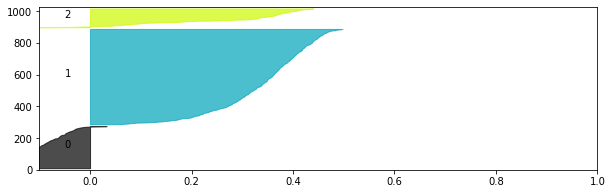

CPU times: user 1min 59s, sys: 1min 8s, total: 3min 7s
Wall time: 42min 42s


In [4]:
%%time
graph_id = 51
graph_type = 'YouTube'
test_data, sample_silhouette_values, km, all_graphs, node_colors = process_data_node2vec(graph_id, n_components)

### YouTube Cluster Component 0

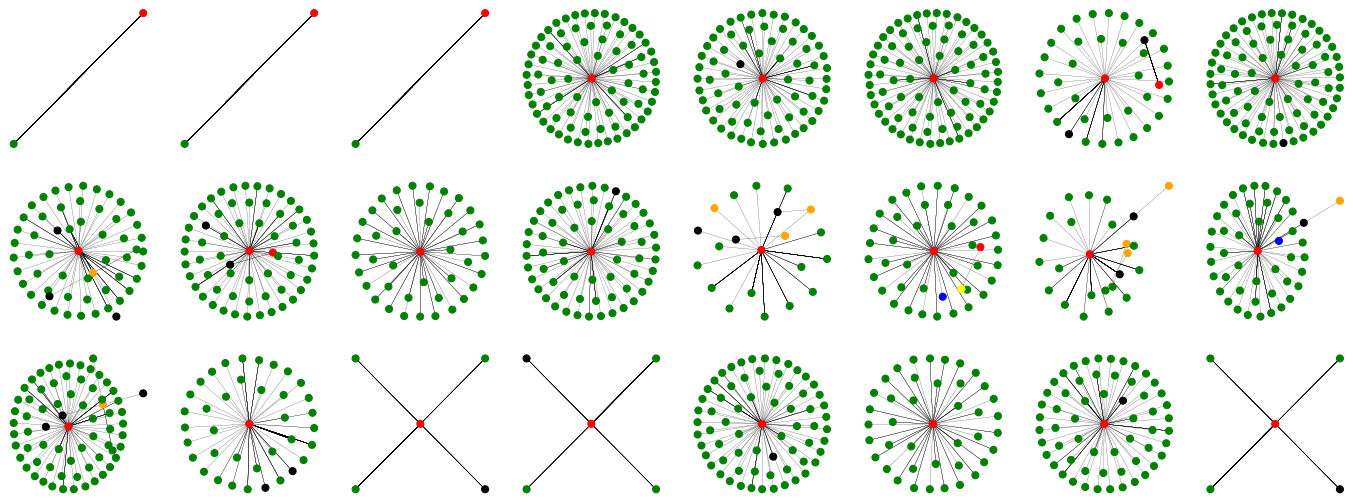

### YouTube Cluster Component 1

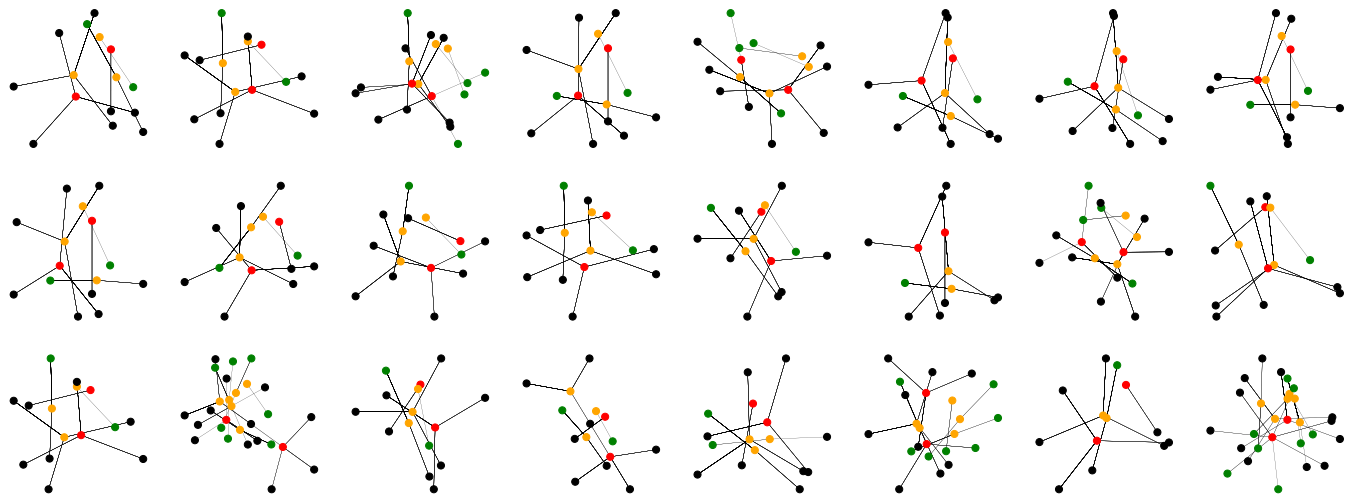

### YouTube Cluster Component 2

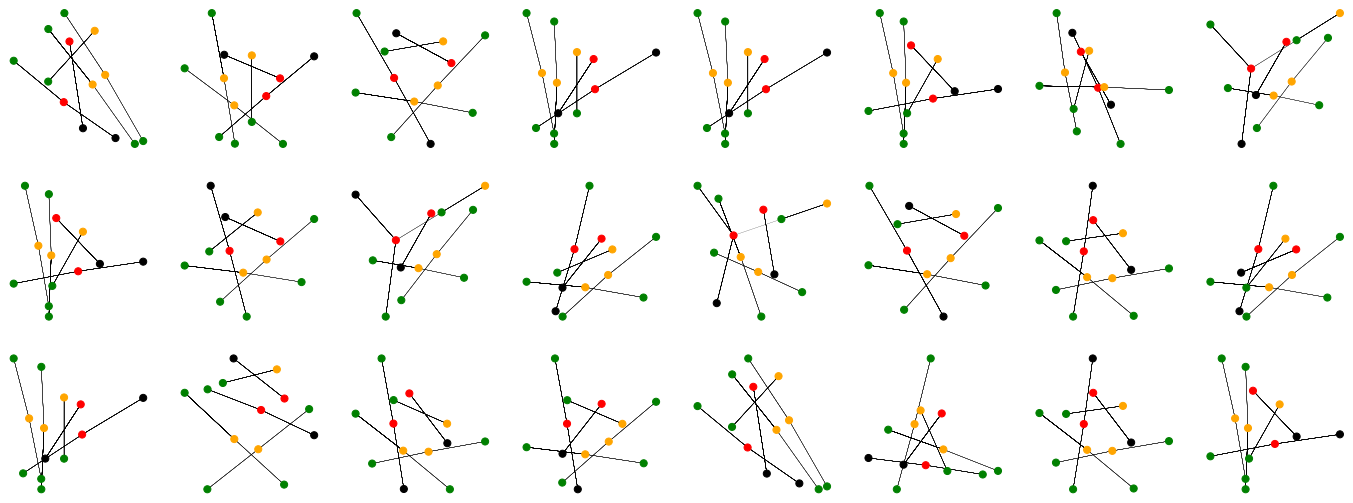

In [5]:
for i_comp in range(n_components):
    display(Markdown('### ' + graph_type + ' Cluster Component ' + str(i_comp)))
    ith_indices = np.where(km.labels_ == i_comp)[0]
    ith_cluster_silhouette_values = sample_silhouette_values[ith_indices]
    sorted_index_array = np.argsort(ith_cluster_silhouette_values)[::-1]
    sub_graphs = [all_graphs[i] for i in ith_indices]
    sub_colors  = [node_colors[i] for i in ith_indices]
    visualize_graphs(sub_graphs, sub_colors, sorted_index_array[0:number_graphs], display_config)

## One Graph From GMail

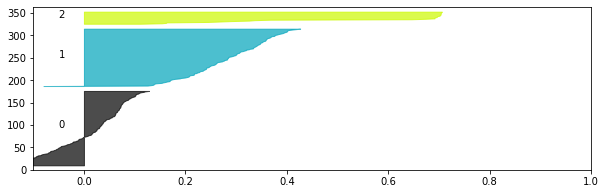

CPU times: user 59.9 s, sys: 26.7 s, total: 1min 26s
Wall time: 14min 13s


In [6]:
%%time
graph_id = 180
graph_type = 'GMail'
test_data, sample_silhouette_values, km, all_graphs, node_colors = process_data_node2vec(graph_id, n_components)

### GMail Cluster Component 0

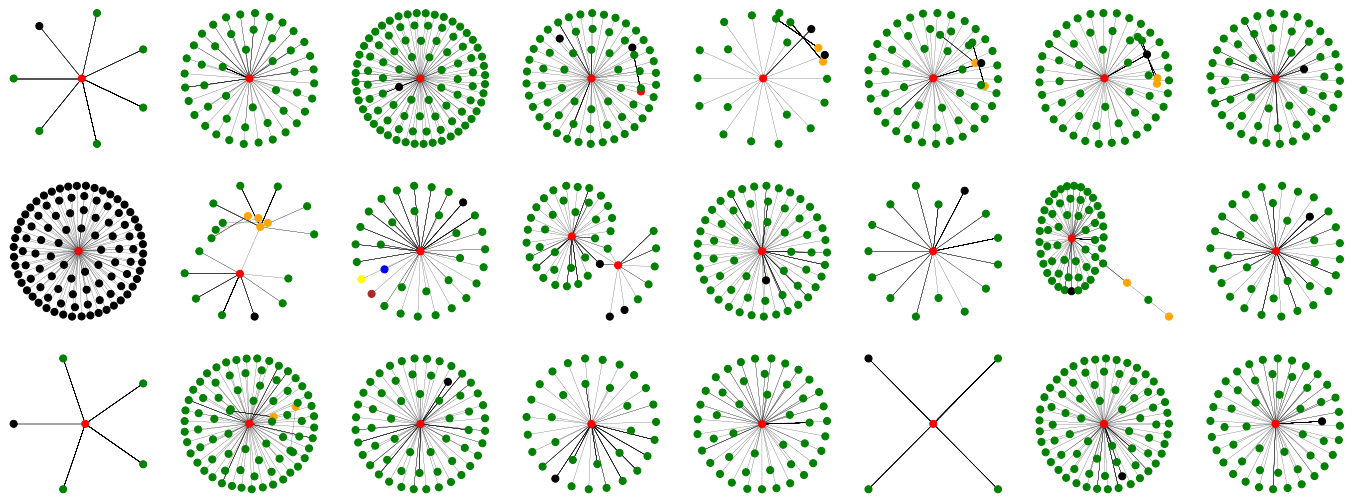

### GMail Cluster Component 1

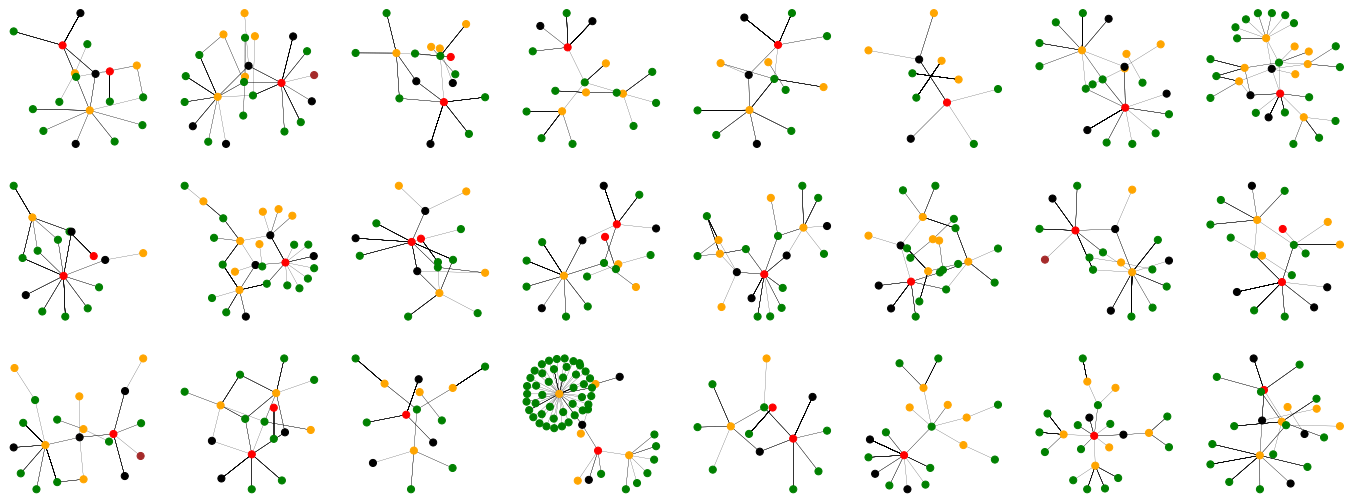

### GMail Cluster Component 2

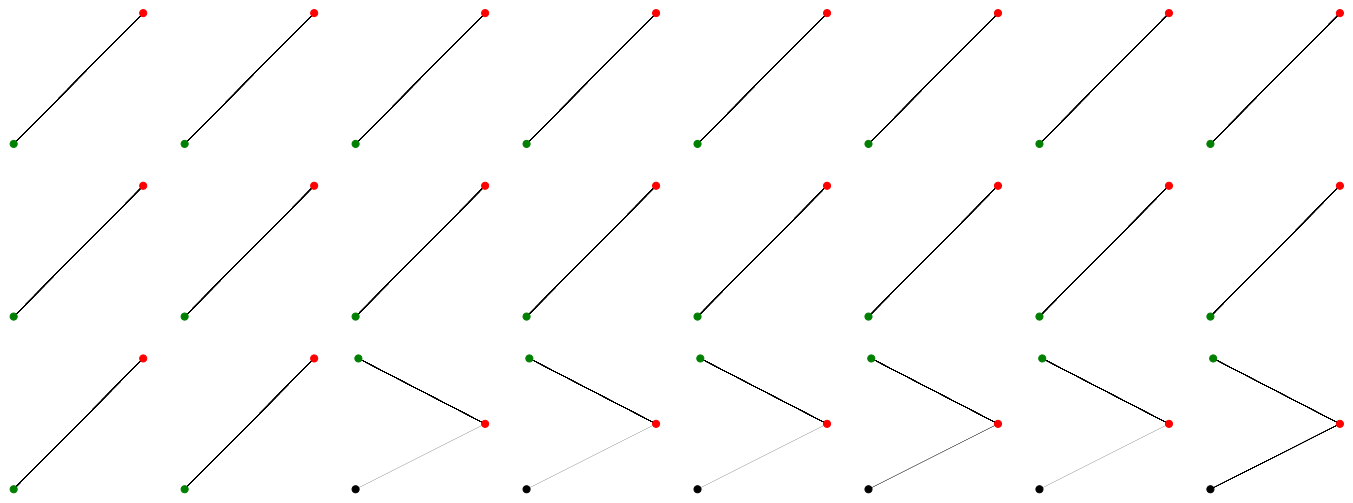

In [7]:
for i_comp in range(n_components):
    display(Markdown('### ' + graph_type + ' Cluster Component ' + str(i_comp)))
    ith_indices = np.where(km.labels_ == i_comp)[0]
    ith_cluster_silhouette_values = sample_silhouette_values[ith_indices]
    sorted_index_array = np.argsort(ith_cluster_silhouette_values)[::-1]
    sub_graphs = [all_graphs[i] for i in ith_indices]
    sub_colors  = [node_colors[i] for i in ith_indices]
    visualize_graphs(sub_graphs, sub_colors, sorted_index_array[0:number_graphs], display_config)

## One Graph From VGame

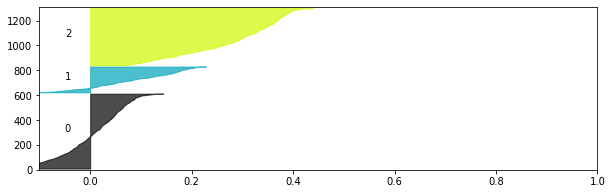

CPU times: user 2min 22s, sys: 1min 41s, total: 4min 4s
Wall time: 55min 58s


In [8]:
%%time
graph_id = 251
graph_type = 'VGame'
test_data, sample_silhouette_values, km, all_graphs, node_colors = process_data_node2vec(graph_id, n_components)

### VGame Cluster Component 0

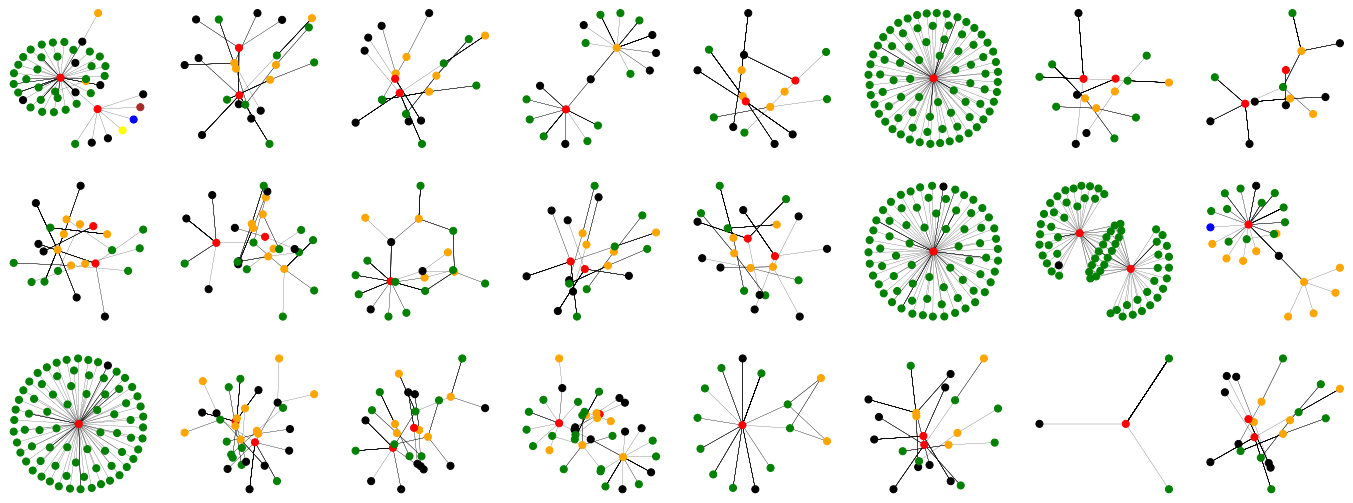

### VGame Cluster Component 1

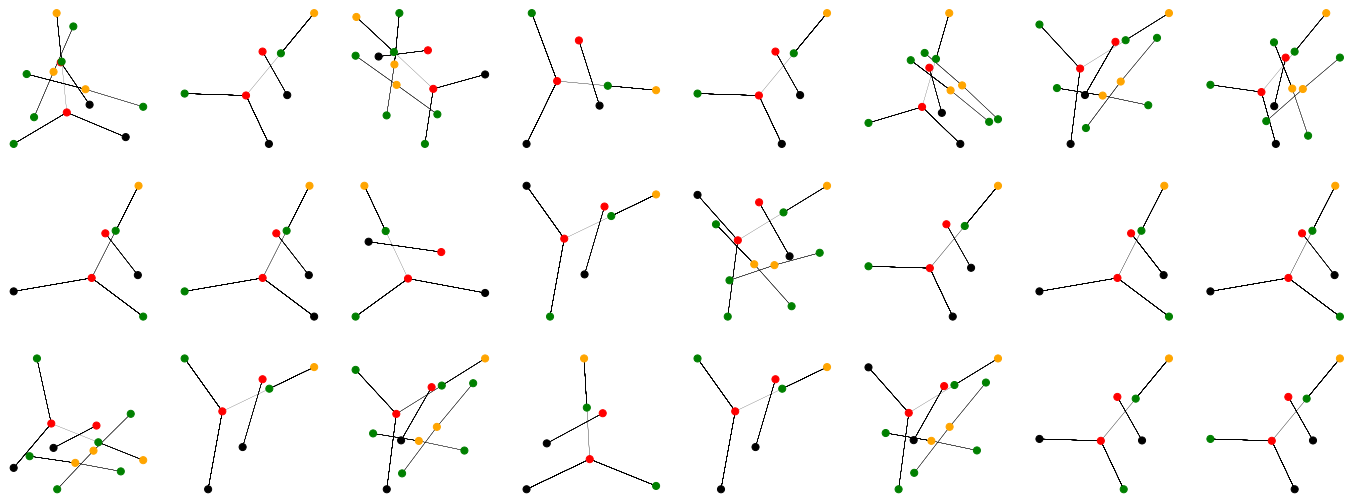

### VGame Cluster Component 2

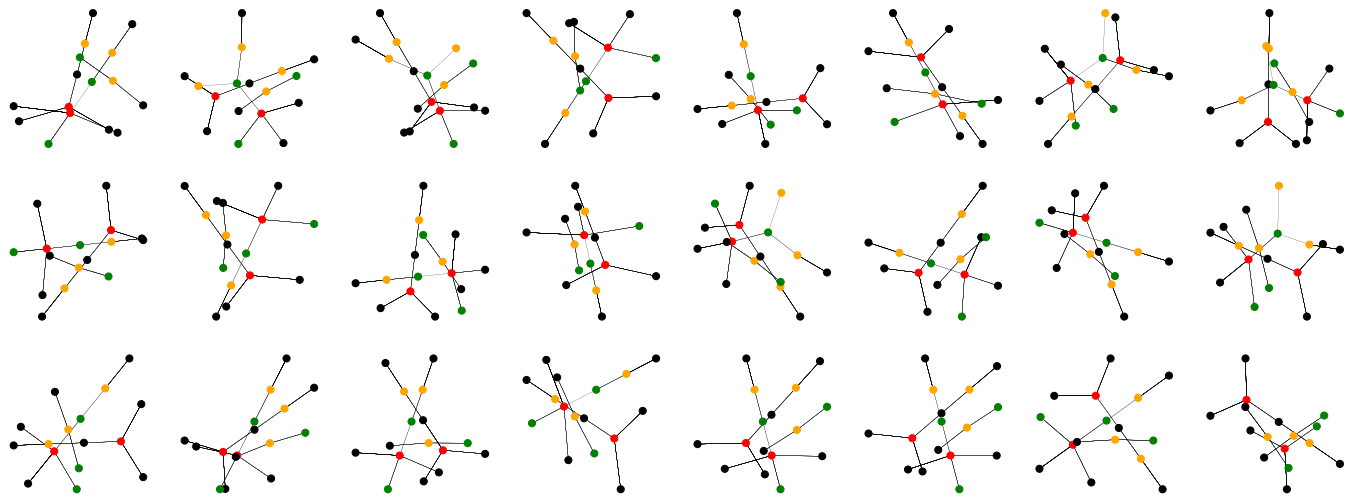

In [9]:
for i_comp in range(n_components):
    display(Markdown('### ' + graph_type + ' Cluster Component ' + str(i_comp)))
    ith_indices = np.where(km.labels_ == i_comp)[0]
    ith_cluster_silhouette_values = sample_silhouette_values[ith_indices]
    sorted_index_array = np.argsort(ith_cluster_silhouette_values)[::-1]
    sub_graphs = [all_graphs[i] for i in ith_indices]
    sub_colors  = [node_colors[i] for i in ith_indices]
    visualize_graphs(sub_graphs, sub_colors, sorted_index_array[0:number_graphs], display_config)

## One Graph From Attack

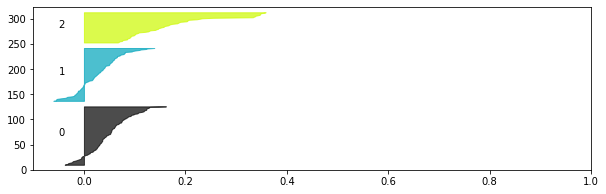

CPU times: user 1min 12s, sys: 28.7 s, total: 1min 40s
Wall time: 13min 13s


In [14]:
%%time
graph_id = 301
graph_type = 'Attack'
test_data, sample_silhouette_values, km, all_graphs, node_colors = process_data_node2vec(graph_id, n_components)

### Attack Cluster Component 0

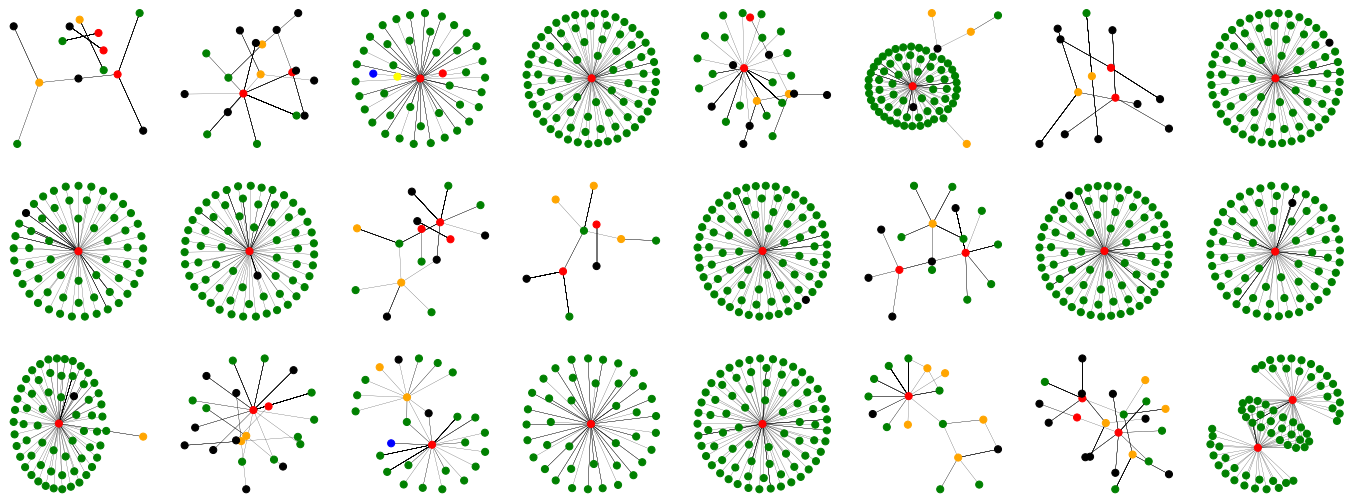

### Attack Cluster Component 1

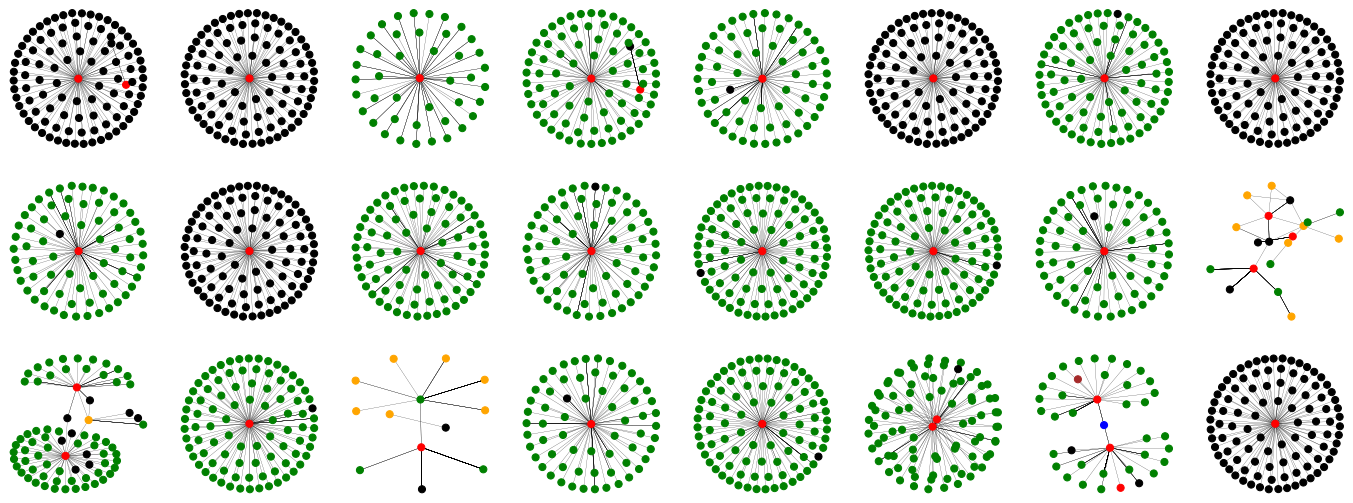

### Attack Cluster Component 2

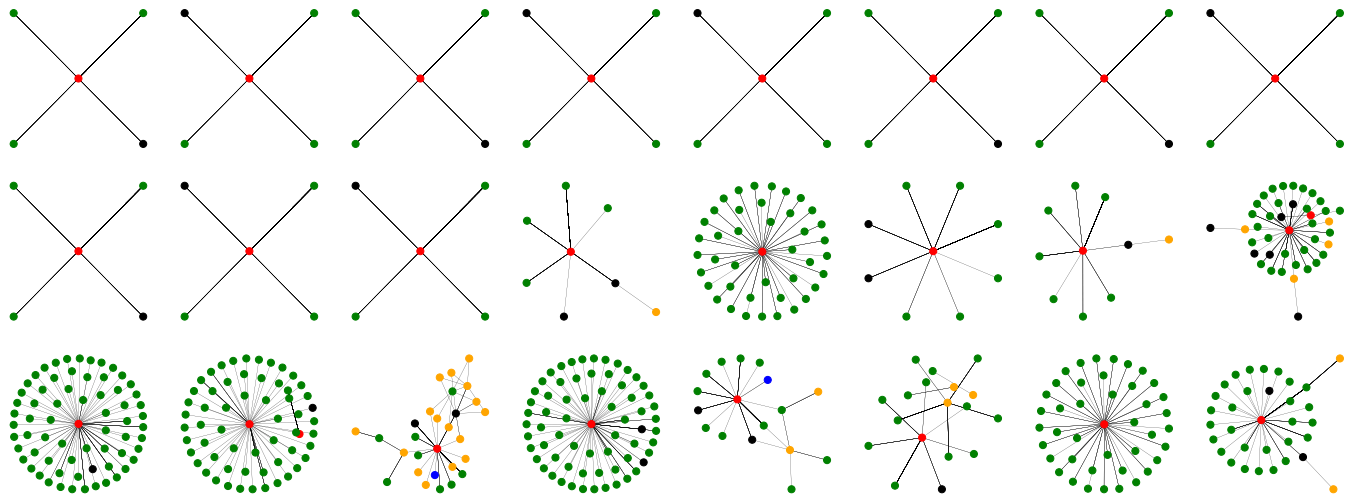

In [15]:
for i_comp in range(n_components):
    display(Markdown('### ' + graph_type + ' Cluster Component ' + str(i_comp)))
    ith_indices = np.where(km.labels_ == i_comp)[0]
    ith_cluster_silhouette_values = sample_silhouette_values[ith_indices]
    sorted_index_array = np.argsort(ith_cluster_silhouette_values)[::-1]
    sub_graphs = [all_graphs[i] for i in ith_indices]
    sub_colors  = [node_colors[i] for i in ith_indices]
    visualize_graphs(sub_graphs, sub_colors, sorted_index_array[0:number_graphs], display_config)

## One Graph From Download

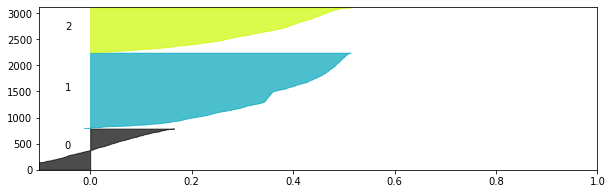

CPU times: user 4min 14s, sys: 4min 29s, total: 8min 44s
Wall time: 2h 13min 44s


In [10]:
%%time
graph_id = 450
graph_type = 'Download'
test_data, sample_silhouette_values, km, all_graphs, node_colors = process_data_node2vec(graph_id, n_components)

### Download Cluster Component 0

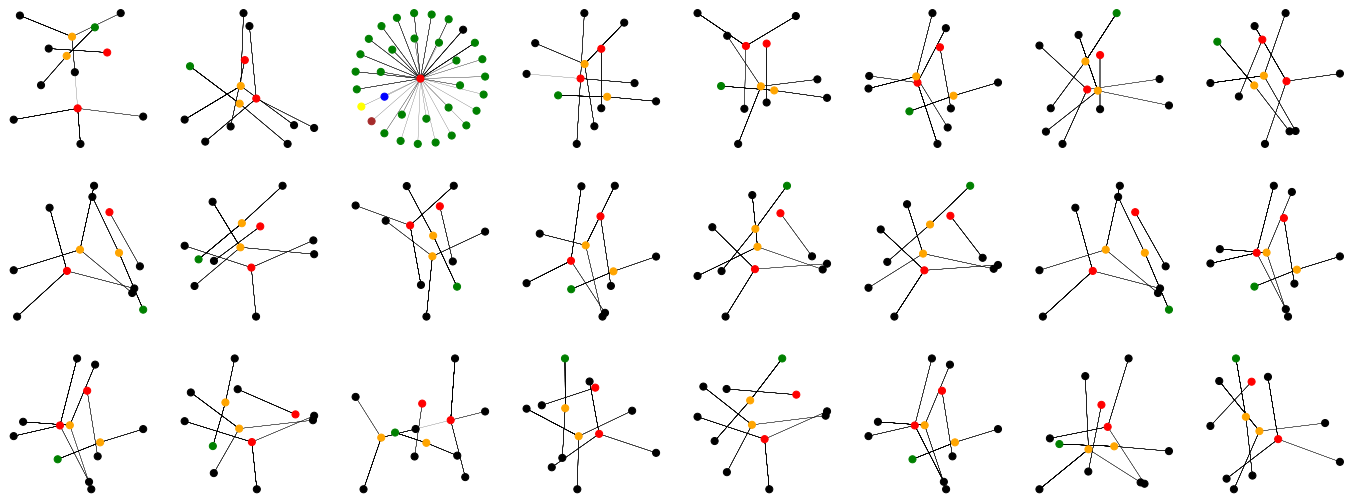

### Download Cluster Component 1

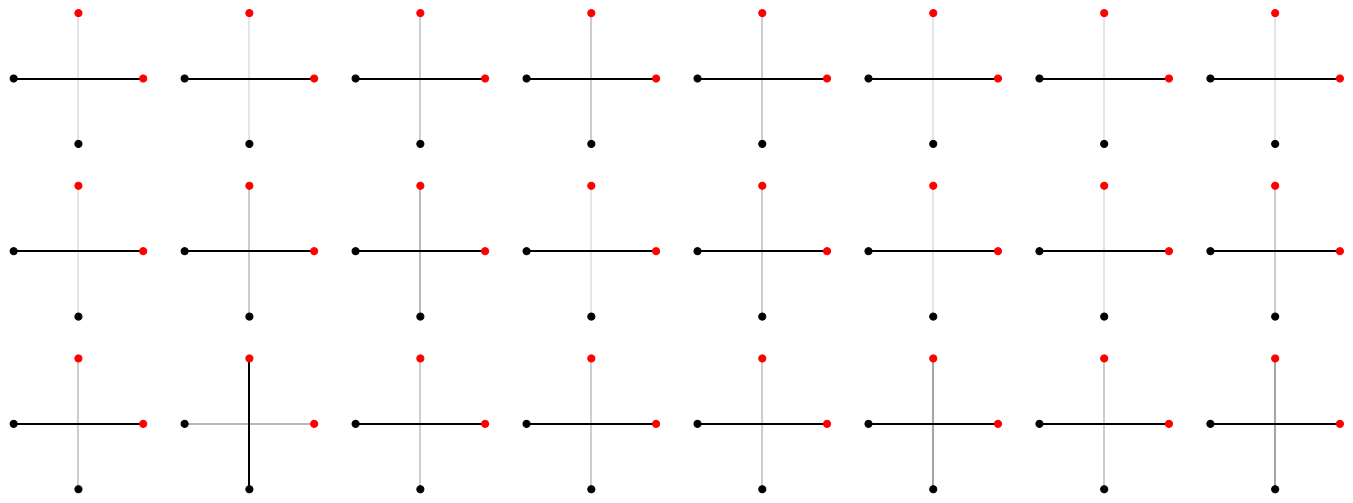

### Download Cluster Component 2

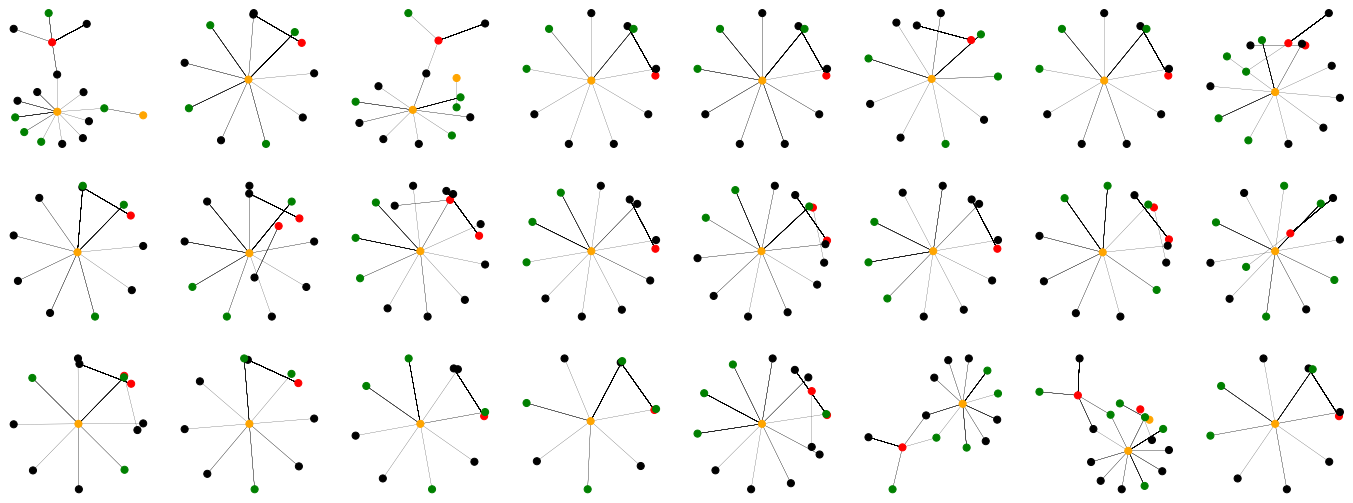

In [11]:
for i_comp in range(n_components):
    display(Markdown('### ' + graph_type + ' Cluster Component ' + str(i_comp)))
    ith_indices = np.where(km.labels_ == i_comp)[0]
    ith_cluster_silhouette_values = sample_silhouette_values[ith_indices]
    sorted_index_array = np.argsort(ith_cluster_silhouette_values)[::-1]
    sub_graphs = [all_graphs[i] for i in ith_indices]
    sub_colors  = [node_colors[i] for i in ith_indices]
    visualize_graphs(sub_graphs, sub_colors, sorted_index_array[0:number_graphs], display_config)

## One Graph From CNN

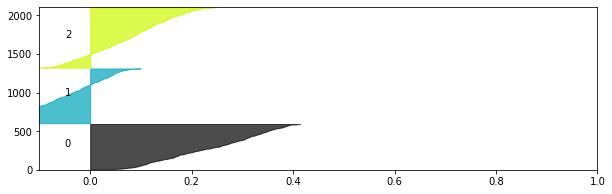

CPU times: user 3min 29s, sys: 3min 18s, total: 6min 47s
Wall time: 1h 31min 42s


In [12]:
%%time
graph_id = 551
graph_type = 'CNN'
test_data, sample_silhouette_values, km, all_graphs, node_colors = process_data_node2vec(graph_id, n_components)

### CNN Cluster Component 0

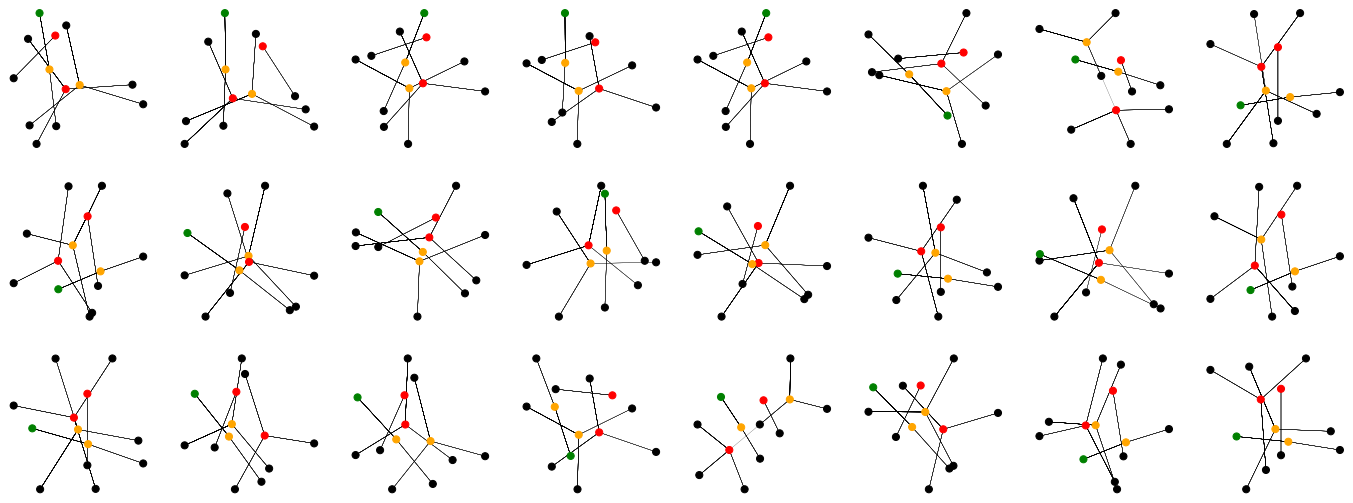

### CNN Cluster Component 1

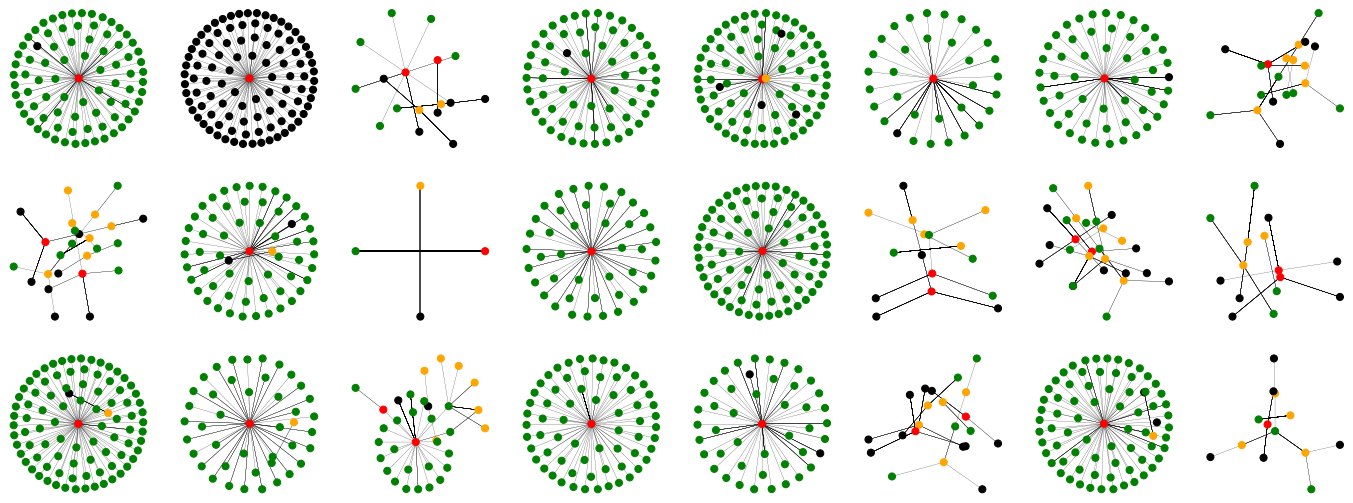

### CNN Cluster Component 2

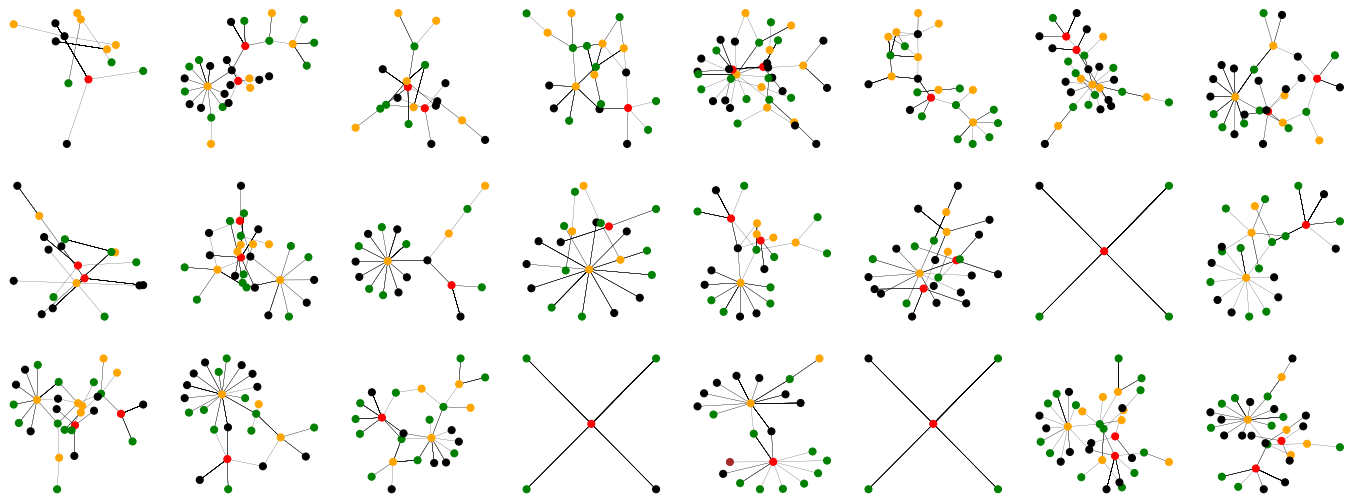

In [13]:
for i_comp in range(n_components):
    display(Markdown('### ' + graph_type + ' Cluster Component ' + str(i_comp)))
    ith_indices = np.where(km.labels_ == i_comp)[0]
    ith_cluster_silhouette_values = sample_silhouette_values[ith_indices]
    sorted_index_array = np.argsort(ith_cluster_silhouette_values)[::-1]
    sub_graphs = [all_graphs[i] for i in ith_indices]
    sub_colors  = [node_colors[i] for i in ith_indices]
    visualize_graphs(sub_graphs, sub_colors, sorted_index_array[0:number_graphs], display_config)